# Es 02.1

Si richiede di calcolare $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx $$ 

usando un sampling con una distribuzione uniforme e con importance sampling; per quest'ultimo modo ho usato la distribuzione 

$$p(x)= 2 (1-x)$$ in quanto simula meglio di una distribuzione uniforme l'andamento dell'integranda.

Si mostrano i grafici in cui si mostrano i valori ottenuti con il blocking method e relative incertezze per il sampling uniforme (in arancione), i valori ottenuti per l'importance sampling e relative incertezze (in blu) e il valore atteso (in rosso).

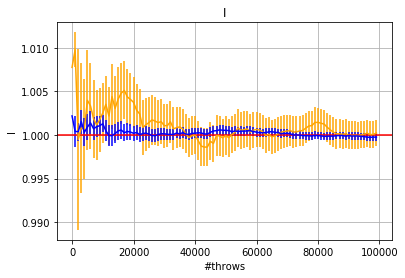

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_file=np.loadtxt('02.1/Data_unif.dat')
data_file2=np.loadtxt('02.1/Data_importance.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

x2=data_file2 [:,0]
sum_prog2=data_file2 [:,1]
err_prog2=data_file2[:,2]

plt.errorbar(x,sum_prog,yerr=err_prog,color='orange',linestyle='-')
plt.errorbar(x2,sum_prog2,yerr=err_prog2,color='b',linestyle='-')
plt.xlabel('#throws')
plt.ylabel('I')
plt.title("I")
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

Si nota come l'importance sampling abbia una incertezza minore rispetto al sampling uniforme.

Per completezza mostro i due grafici ottenuti non sovrapposti.

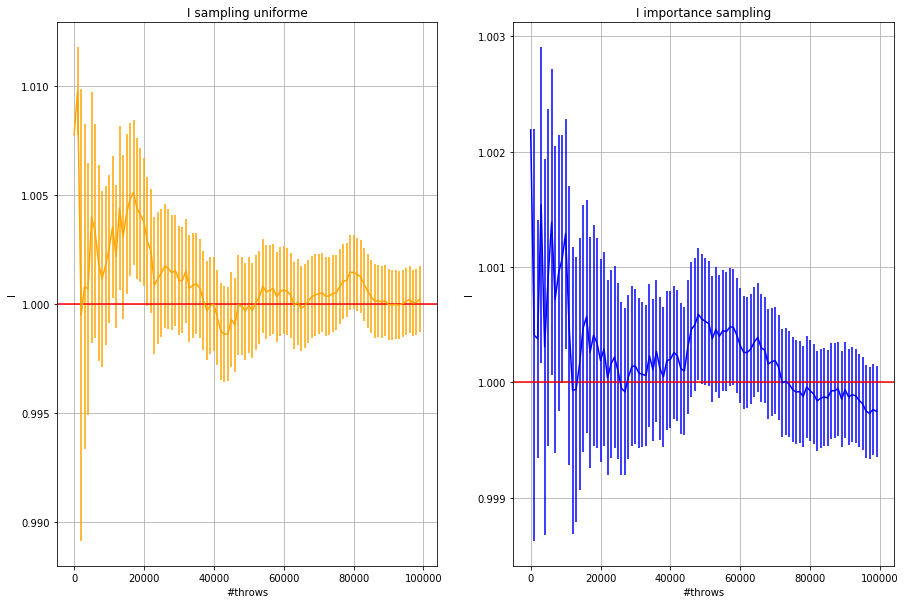

In [7]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
axes[0].errorbar(x,sum_prog,yerr=err_prog,color='orange',linestyle='-')
axes[0].set_title("I sampling uniforme")
axes[0].grid(True)
axes[0].axhline(y=1, color='r', linestyle='-')


axes[1].errorbar(x2,sum_prog2,yerr=err_prog2,color='b',linestyle='-')
axes[1].set_title('I importance sampling')
axes[1].grid(True)
axes[1].axhline(y=1, color='r', linestyle='-')

for ax in axes.flat:
    ax.set(xlabel='#throws', ylabel='I')

plt.show()

# Es 02.2

a) Si richiede di replicare un processo di RW su un reticolo cubico 3D di spaziatura $a=1$ e di mostrare il variare di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in base al numero di step:

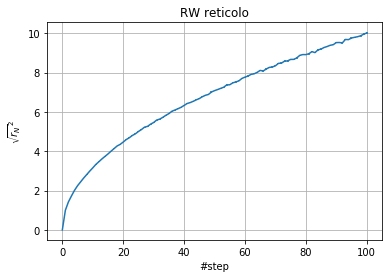

In [9]:
data_file=np.loadtxt('02.2/DataRWreticolo.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#step')
plt.ylabel("$\sqrt{r_N}^2$")
plt.title("RW reticolo")
plt.grid(True)
plt.show()

Purtroppo sulla scala del grafico non si riescono ad apprezzare le barre di errore ottenute dal data blocking.

b) Si richiede di replicare un processo di RW in un continuo 3D e di mostrare il variare di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in base al numero di step:

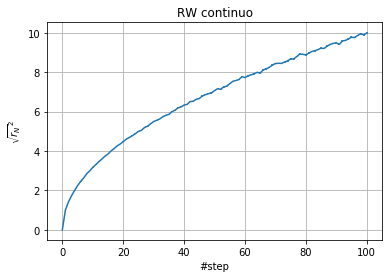

In [10]:
data_file2=np.loadtxt('02.2/DataRWsfera.dat')

x2=data_file [:,0]
sum_prog2=data_file2 [:,1]
err_prog2=data_file2[:,2]

plt.errorbar(x2,sum_prog2,yerr=err_prog2)
plt.xlabel('#step')
plt.ylabel("$\sqrt{r_N}^2$")
plt.title("RW continuo")
plt.grid(True)
plt.show()

Si nota che si possono fittare entrambi i grafici con una funzione del tipo
$$f(N)=k\sqrt{N}$$

Si mostrano i due grafici ottenuti (in blu) fittati con una curva del tipo $f(N)$ (in rosso)

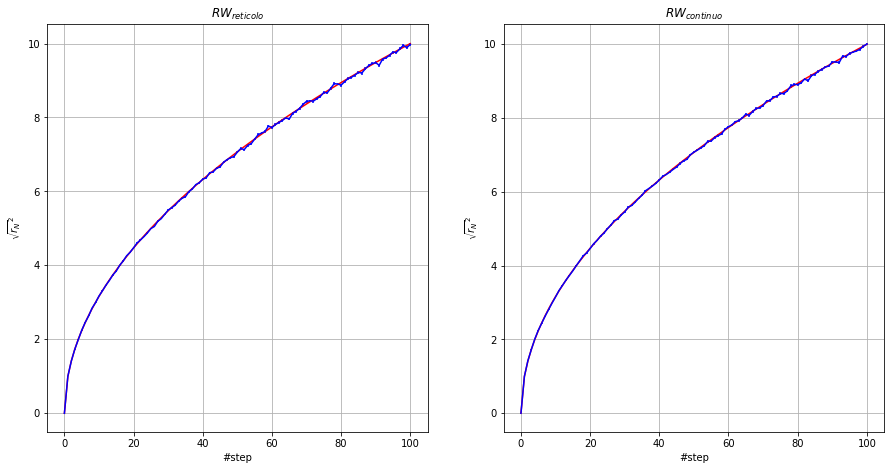

In [13]:
f=np.zeros(101)
for (i) in range (101):
    f[i]=(i)**0.5
    
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,7.5))

axes[0].errorbar(x2,sum_prog2,yerr=err_prog2,color='b')
axes[0].set_title("$RW_{reticolo}$")
axes[0].grid(True)
axes[0].plot(x2,f,color='r',linestyle='-')

axes[1].errorbar(x,sum_prog,yerr=err_prog,color='b')
axes[1].set_title("$RW_{continuo}$")
axes[1].grid(True)
axes[1].plot(x,f,color='r',linestyle='-')

for ax in axes.flat:
    ax.set(xlabel='#step', ylabel='$\sqrt{r_N}^2$')
plt.show()